# Quais passageiros sobreviveriam ao acidente do Titanic? 

# 1. Introdução
O objetivo deste estudo é prever, baseado na idade, sexo e outros atributos, se uma pessoa sobreviveria ao acidente ou não. Este projeto é baseado na competição do Kaggle, disponível em: https://www.kaggle.com/c/titanic/.

# 2. Dados

A base de dados utilizada consiste em uma base de treino (train.csv), que possui os atributos dos passageiros e a informação se ele sobreviveu ou não ao desastre, composta de 891 linhas. Esta base será utilizada treinar e validar o modelo de Machine Learning que pretendemos desevolver.

Aleḿ da base de treino, também utilizaremos a base de teste (test.csv) onde são disponibilizados atributos de passageiros, mas não é informado se eles sobreviveram ao não ao desastre. Nosso objetivo é utilizar o modelo desenvolvido para prever resultados para a base de testes, para posteriormente enviá-los para a avaliação da plataforma Kaggle, que deverá avaliar a precisão do modelo desenvolvido com base nos resultados.

Os atributos dos passageiros e suas variáveis são listados a seguir:

*   PassengerId: id de 1 a 891
*   Survived: 0 = Sobreviveu , 1 = Não sobreviveu
*   Pclass (classe): Alta, Média, Baixa
*   Name: nome
*   Sex: feminino, masculino
*   Age (idade): É fracional se menor do que 1. Se estimada, é xx.5
*   SibSp (quantidade de parentes a bordo com parentesco de irmão, marido, esposa): 0 a 8
*   Parch (quantidade de parentes a bordo com parentesco de mãe, pai, filho, filha): 0 a 6
*   Ticket: número do ticket
*   Fare: tarifa do passageiro 
*   Cabin: número da cabine
*   Embarked: C = Cherbourg, Q = Queenstown, S = Southampton


# 3. WorKflow

Para desenvolver o modelo, adotaremos o seguinte Worflow:

> 
1. Importação de dados de treino
2. Análise da base de dados (verificação de valores faltantes e métodos possíveis para tratar estes dados)
3. Definição do modelo de Machine Learning divisão da base de treino e validação
4. Avaliação dos modelos
5. Ajustes de hiperparâmetros
6. Comparação dos modelos e conclusão

In [59]:
# Importando as primeiras ferramentas...
import pandas as pd
import numpy as np

In [60]:
# Importando os dados de treino...
df = pd.read_csv('https://raw.githubusercontent.com/ms-r0bot/Data-Science-Machine-Learning/main/titanic-competition/train.csv')

In [61]:
# Obtendo informações gerais sobre os dados...
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [62]:
# Verificando se existem colunas com dados faltando...
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [63]:
# Vamos começar a tratar os dados. 
# Primeiramente, a idade: existem 177 valores faltando, então vamos preencher estes valores com a média das idades dos demais passageiros

for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df['Age'] = df['Age'].fillna(content.median())
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [64]:
# Existem muitos dados de cabine faltando e não parece haver nenhum padrão lógico que nos permita inferir como eles estão relacionados.
# Portanto, será necessário fazer alguma pesquisa para entender a lógica de "encabinamento" do Titanic
df.sort_values(by=['Cabin'], ascending=True,na_position='last').head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
583,584,0,1,"Ross, Mr. John Hugo",male,36.0,0,0,13049,40.1250,A10,C
475,476,0,1,"Clifford, Mr. George Quincy",male,28.0,0,0,110465,52.0000,A14,S
556,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,A16,C
284,285,0,1,"Smith, Mr. Richard William",male,28.0,0,0,113056,26.0000,A19,S
599,600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,C


In [65]:
# Após alguma pesquisa, foi possível descobrir que as cabines eram formadas pelas letras A,B,C,D E,F, G e T, que identificavam os decks.
# Talvez seja interessante separar a numeração das letras para melhorar o entendimento do algorítmo.
cabines = df['Cabin'].unique()
cabines

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [66]:
# Vamos criar uma coluna para receber somente a letra referente ao Deck
df['Deck'] = df['Cabin'].str.extract(r'([ABCDEFGT])')

In [67]:
# Vamos criar uma coluna para receber somente a letra referente ao Deck
df['Num'] = df['Cabin'].str.extract(r'([0-9]*$)')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Deck         204 non-null    object 
 13  Num          204 non-null    object 
dtypes: float64(2), int64(5), object(7)
memory usage: 97.6+ KB


In [69]:
# O próximo passo para o tratamento é transformar os dados do tipo string (object) em tipo categoria.

for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    category
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    category
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    category
 11  Embarked     889 non-null    category
 12  Deck         204 non-null    category
 13  Num          204 non-null    category
dtypes: category(7), float64(2), int64(5)
memory usage: 139.8 KB


In [70]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Deck           687
Num            687
dtype: int64

In [71]:
# Em campos categóricos vazios, o código que traz a informação de campo vazio é -1. Por isso, ao somar +1, os campos vazios passam a ter código = 0 e os campos que já possuiam algum valor ficam com código = [código + 1].

for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull:
            df[label] = pd.Categorical(content).codes+1
df.info(), df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int16  
 4   Sex          891 non-null    int8   
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int16  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int16  
 11  Embarked     891 non-null    int8   
 12  Deck         891 non-null    int8   
 13  Num          891 non-null    int8   
dtypes: float64(2), int16(3), int64(5), int8(4)
memory usage: 57.6 KB


(None, PassengerId    0
 Survived       0
 Pclass         0
 Name           0
 Sex            0
 Age            0
 SibSp          0
 Parch          0
 Ticket         0
 Fare           0
 Cabin          0
 Embarked       0
 Deck           0
 Num            0
 dtype: int64)

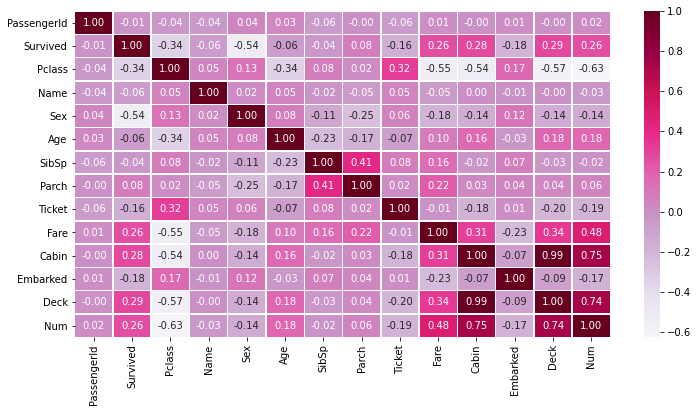

In [72]:
# Ao plotar uma a matriz de correlação para entender como os dados influenciam se um passageiro sobrevive ou não.
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt='.2f', cmap='PuRd');


In [73]:
# Com os dados preparados, podemos pensar nos estimadores que podem ser utilizados para construir o modelo de ML.
# Este problema pode ser tratado como uma regressão binomial, onde deseja-se obter o a previsão com 2 possíveis resultados: sobrevivente ou não-sobrevivente.

In [74]:
# Separando a base de dados em validação e treino:
from sklearn.model_selection import train_test_split

x = df.drop('Survived', axis=1)
y = df['Survived']
x_train , x_val , y_train, y_val = train_test_split(x,y, test_size=0.2, random_state=42 )

In [75]:
# Vamos importar os classificadores que vamos utilizar e em seguida, criar um dicionário para encapsular os estimadores

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
modelos = {'Gaussian Naive Bayes': GaussianNB() ,
           'Logistic Regression': LogisticRegression(max_iter=100000),
           'Random Forest Classifier': RandomForestClassifier()}

# Vamos criar uma função para treinar, testar e avaliar os modelos

def treino_teste_avaliacao (modelos, x_train,y_train, x_val, y_val):
    np.random.seed(42)
    modelos_scores={}
    for nome, modelo in modelos.items():
        modelo.fit(x_train,y_train)
        modelos_scores[nome] = modelo.score(x_val,y_val)
    return modelos_scores


In [76]:
treino_teste_avaliacao (modelos, x_train,y_train, x_val, y_val)

{'Gaussian Naive Bayes': 0.7374301675977654,
 'Logistic Regression': 0.8156424581005587,
 'Random Forest Classifier': 0.8547486033519553}

In [78]:
# Vamos tentar melhorar os resultados através de ajustes de hiperparâmetros utilizando o RandomizedSearchCV
# Para isso, é necessário criar um dicionário contendo os hiperparâmetros dos 2 estimadores escolhidos 
# *Gaussian Naive Bayes foi descartado pois não pode ser melhorado através de otimização hiperparâmetros
np.random.seed(42)
logistic_rscv_hype = {'C': np.logspace(-4,4,20),
            'solver': ['liblinear']}

rand_rscv_hype = {'n_estimators': np.arange(10,10000,50),
             'max_depth':[None, 3, 5, 10] ,
             'min_samples_split': np.arange(2,20,2),
             'min_samples_leaf': np.arange(1,20,1)}

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV,cross_val_score, RandomizedSearchCV
# Com os dicionários de hiperparâmetros criados, é hora de utilizar o RandomizedSearchCV nos 2 estimadores com o LogisticRegression
logistic_rscv = RandomizedSearchCV(LogisticRegression(), param_distributions = logistic_rscv_hype, cv=5, n_iter=20, verbose=True)
logistic_rscv.fit(x_train,y_train)


# Fazer o mesmo para o Random Forest Classifier
rand_rscv = RandomizedSearchCV(RandomForestClassifier(), param_distributions = rand_rscv_hype, cv=5, n_iter=20, verbose=True)
rand_rscv.fit(x_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 15.8min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [79]:
logistic_rscv.score(x_val, y_val),rand_rscv.score(x_val, y_val)

(0.8156424581005587, 0.8212290502793296)